In [57]:
import networkx as nx
import matplotlib.pyplot as plt

In [58]:
G = nx.Graph()

In [59]:
G.nodes

NodeView(())

In [84]:
# Visualisation helper function
def view_graph(G):
    import warnings

    warnings.filterwarnings("ignore")
    # Print nodes and edges
    print(f"Nodes in graph: {G.nodes}")
    print(f"Edges in graph: {G.edges}")
    # Create a visualisation using NetworkX and draw using matplotlib
    pos = nx.spring_layout(G)
    # Extract node attributes and display them as labels
    if len(nx.get_node_attributes(G, "population")) != 0:
        labels = {
            key: key + ":" + str(value)
            for (key, value) in nx.get_node_attributes(G, "population").items()
        }
        nx.draw(G, pos=pos, with_labels=True, labels=labels)
    else:
        nx.draw(G, pos=pos, with_labels=True)
    # Extract edge attributes and display them as labels
    if len(nx.get_edge_attributes(G, "distance")) != 0:
        edge_labels = nx.get_edge_attributes(G, "distance")
        nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
    plt.figure(figsize=(12, 12))
    plt.show()

Nodes in graph: [1, 2, 3]
Edges in graph: [(1, 2), (1, 3), (2, 3)]


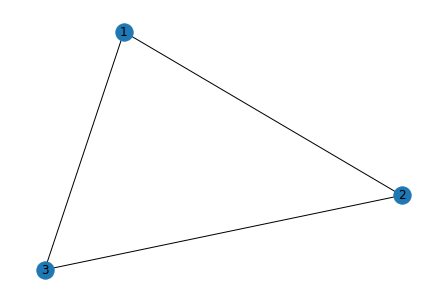

<Figure size 864x864 with 0 Axes>

In [85]:
G.add_node(1)
view_graph(G)

Nodes in graph: [1, 2, 3]
Edges in graph: [(1, 2), (1, 3), (2, 3)]


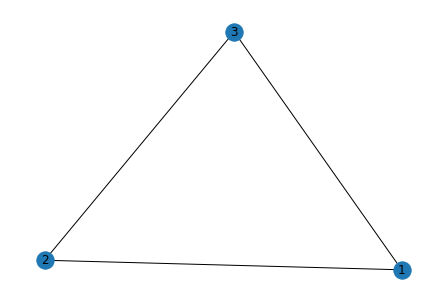

<Figure size 864x864 with 0 Axes>

In [86]:
G.add_nodes_from([2, 3])
view_graph(G)

Nodes in graph: [1, 2, 3]
Edges in graph: [(1, 2), (1, 3), (2, 3)]


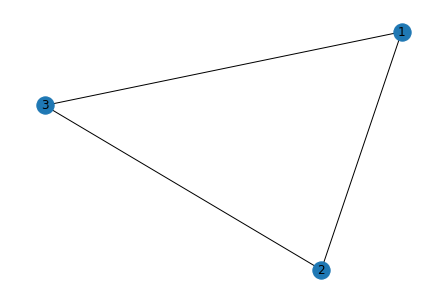

<Figure size 864x864 with 0 Axes>

In [87]:
G.add_edge(1, 2)
view_graph(G)

Nodes in graph: [1, 2, 3]
Edges in graph: [(1, 2), (1, 3), (2, 3)]


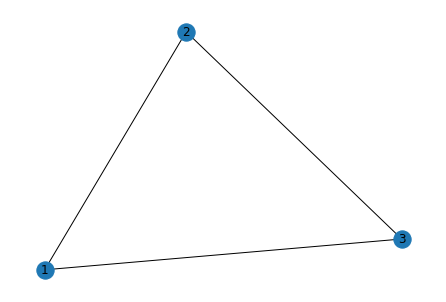

<Figure size 864x864 with 0 Axes>

In [88]:
G.add_edges_from([(1, 3), (2, 3)])
view_graph(G)

Nodes in graph: ['Arthur', 'Jenny', 'Chris']
Edges in graph: [('Arthur', 'Jenny'), ('Arthur', 'Chris'), ('Jenny', 'Chris')]


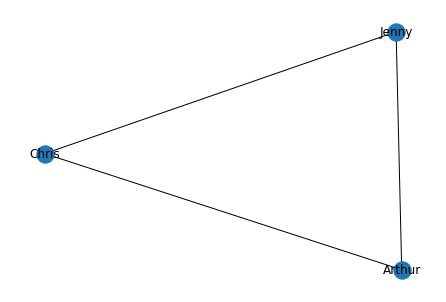

<Figure size 864x864 with 0 Axes>

In [89]:
friends = nx.Graph([("Arthur", "Jenny"), ("Jenny", "Chris"), ("Chris", "Arthur")])
view_graph(friends)

In [90]:
list(friends.neighbors("Arthur"))

['Jenny', 'Chris']

Nodes in graph: ['Jenny', 'Chris']
Edges in graph: [('Jenny', 'Chris')]


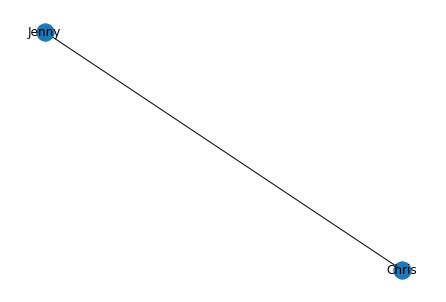

<Figure size 864x864 with 0 Axes>

In [91]:
friends.remove_node("Arthur")
view_graph(friends)

Nodes in graph: ['Jenny', 'Chris']
Edges in graph: []


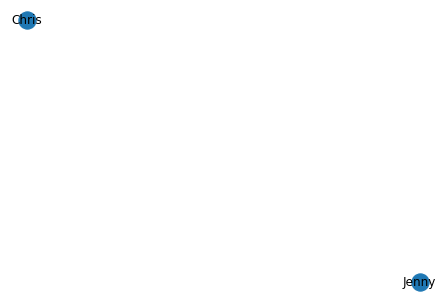

<Figure size 864x864 with 0 Axes>

In [92]:
friends.remove_edge("Chris", "Jenny")
view_graph(friends)

In [93]:
help(friends)

Help on Graph in module networkx.classes.graph object:

class Graph(builtins.object)
 |  Graph(incoming_graph_data=None, **attr)
 |  
 |  Base class for undirected graphs.
 |  
 |  A Graph stores nodes and edges with optional data, or attributes.
 |  
 |  Graphs hold undirected edges.  Self loops are allowed but multiple
 |  (parallel) edges are not.
 |  
 |  Nodes can be arbitrary (hashable) Python objects with optional
 |  key/value attributes, except that `None` is not allowed as a node.
 |  
 |  Edges are represented as links between nodes with optional
 |  key/value attributes.
 |  
 |  Parameters
 |  ----------
 |  incoming_graph_data : input graph (optional, default: None)
 |      Data to initialize graph. If None (default) an empty
 |      graph is created.  The data can be any format that is supported
 |      by the to_networkx_graph() function, currently including edge list,
 |      dict of dicts, dict of lists, NetworkX graph, 2D NumPy array, SciPy
 |      sparse matrix, or 

## End

Nodes in graph: ['London', 'Manchester', 'Leeds']
Edges in graph: [('London', 'Manchester'), ('London', 'Leeds'), ('Manchester', 'Leeds')]


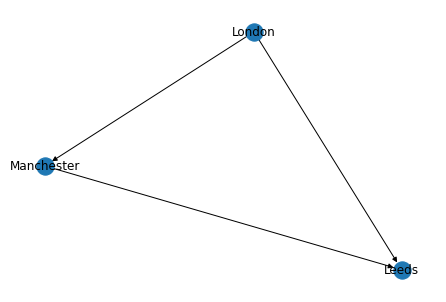

<Figure size 864x864 with 0 Axes>

In [94]:
uk_places = nx.DiGraph(
    [("London", "Manchester"), ("Manchester", "Leeds"), ("London", "Leeds")]
)
view_graph(uk_places)

In [95]:
print(list(uk_places.successors("London")))
print(list(uk_places.predecessors("London")))

['Manchester', 'Leeds']
[]


Nodes in graph: ['London', 'Manchester']
Edges in graph: [('London', 'Manchester')]


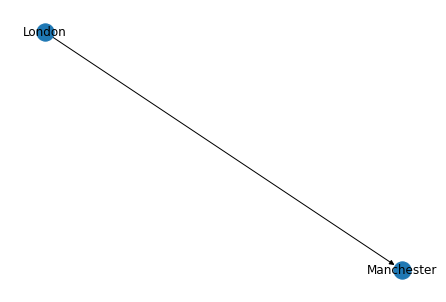

<Figure size 864x864 with 0 Axes>

In [96]:
subgraph = uk_places.subgraph(["London", "Manchester"])
view_graph(subgraph)

Nodes in graph: ['Northampton', 'Leicester', 'Loughborough']
Edges in graph: [('Northampton', 'Leicester'), ('Leicester', 'Loughborough')]


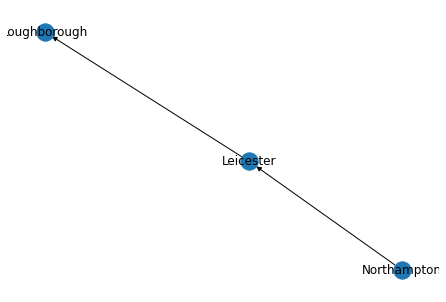

<Figure size 864x864 with 0 Axes>

In [97]:
uk_places_new = nx.DiGraph(
    [("Northampton", "Leicester"), ("Leicester", "Loughborough")]
)
view_graph(uk_places_new)

Nodes in graph: ['London', 'Manchester', 'Leeds', 'Northampton', 'Leicester', 'Loughborough']
Edges in graph: [('London', 'Manchester'), ('London', 'Leeds'), ('Manchester', 'Leeds'), ('Northampton', 'Leicester'), ('Leicester', 'Loughborough')]


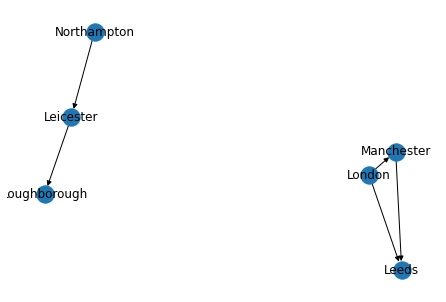

<Figure size 864x864 with 0 Axes>

In [98]:
combined_places = nx.union(uk_places, uk_places_new)
view_graph(combined_places)

Nodes in graph: ['old-London', 'old-Manchester', 'old-Leeds', 'new-London', 'new-Manchester', 'new-Leeds']
Edges in graph: [('old-London', 'old-Manchester'), ('old-London', 'old-Leeds'), ('old-Manchester', 'old-Leeds'), ('new-London', 'new-Manchester'), ('new-Leeds', 'new-London'), ('new-Leeds', 'new-Manchester')]


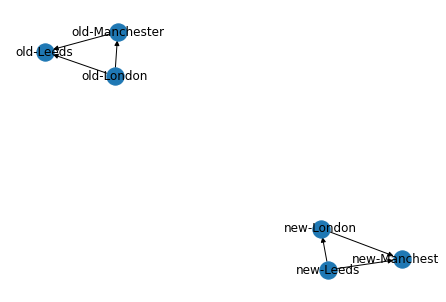

<Figure size 864x864 with 0 Axes>

In [99]:
uk_places_to_intersect = nx.DiGraph(
    [("London", "Manchester"), ("Leeds", "London"), ("Leeds", "Manchester")]
)
combined = nx.union(uk_places, uk_places_to_intersect, rename=("old-", "new-"))
view_graph(combined)

Nodes in graph: ['Leeds', 'London', 'Manchester']
Edges in graph: [('London', 'Manchester')]


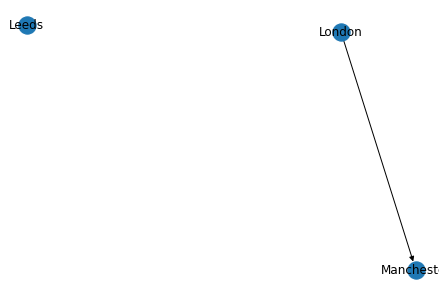

<Figure size 864x864 with 0 Axes>

In [100]:
intersected = nx.intersection(uk_places, uk_places_to_intersect)
view_graph(intersected)

Nodes in graph: ['London', 'Manchester', 'Leeds']
Edges in graph: [('London', 'Manchester'), ('London', 'Leeds'), ('Manchester', 'Leeds')]


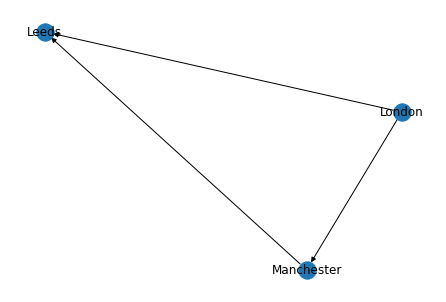

<Figure size 864x864 with 0 Axes>

In [101]:
view_graph(uk_places)

In [102]:
uk_places.degree

DiDegreeView({'London': 2, 'Manchester': 2, 'Leeds': 2})

In [103]:
print("In: " + str(uk_places.in_degree))
print("Out: " + str(uk_places.out_degree))

In: [('London', 0), ('Manchester', 1), ('Leeds', 2)]
Out: [('London', 2), ('Manchester', 1), ('Leeds', 0)]


In [104]:
uk_places.out_degree(["Manchester", "Leeds"])

OutDegreeView({'Manchester': 1, 'Leeds': 0})

## End

Nodes in graph: ['London', 'Manchester', 'Leeds']
Edges in graph: [('London', 'Manchester'), ('London', 'Leeds'), ('Manchester', 'Leeds')]


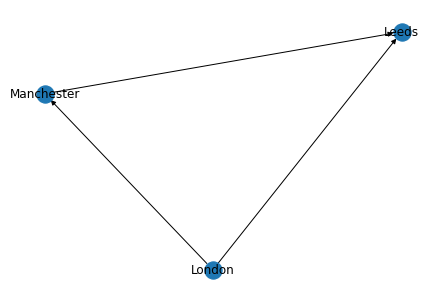

<Figure size 864x864 with 0 Axes>

In [105]:
view_graph(uk_places)

Nodes in graph: ['London', 'Manchester', 'Leeds']
Edges in graph: [('London', 'Manchester'), ('London', 'Leeds'), ('Manchester', 'Leeds')]


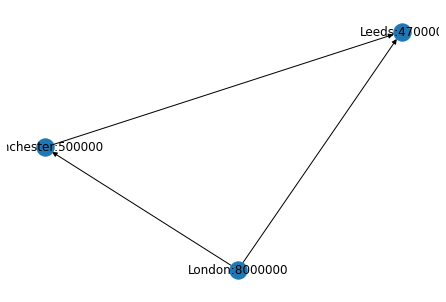

<Figure size 864x864 with 0 Axes>

In [106]:
uk_places.nodes["London"]["population"] = 8000000
uk_places.nodes["Manchester"]["population"] = 500000
uk_places.nodes["Leeds"]["population"] = 470000
view_graph(uk_places)

Nodes in graph: ['London', 'Manchester', 'Leeds']
Edges in graph: [('London', 'Manchester'), ('London', 'Leeds'), ('Manchester', 'Leeds')]


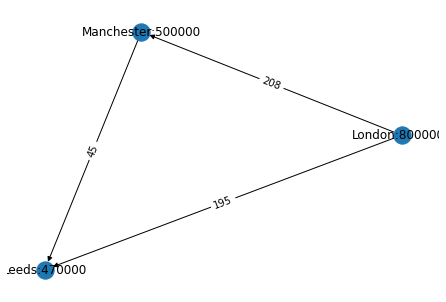

<Figure size 864x864 with 0 Axes>

In [107]:
uk_places.edges["London", "Leeds"]["distance"] = 195
uk_places.edges["London", "Manchester"]["distance"] = 208
uk_places.edges["Manchester", "Leeds"]["distance"] = 45
view_graph(uk_places)

Nodes in graph: ['London', 'Manchester', 'Leeds']
Edges in graph: [('London', 'Manchester'), ('London', 'Leeds'), ('Manchester', 'Leeds')]


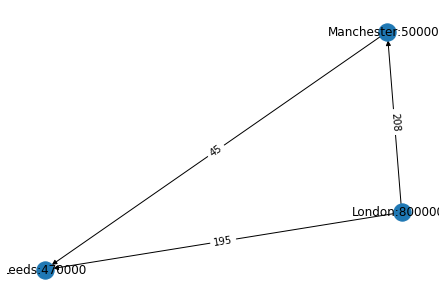

<Figure size 864x864 with 0 Axes>

In [108]:
node_attributes = {
    "London": {"population": 8000000},
    "Manchester": {"population": 500000},
    "Leeds": {"population": 470000},
}

nx.set_node_attributes(uk_places, node_attributes)

edge_attributes = {
    ("London", "Leeds"): {"distance": 195},
    ("London", "Manchester"): {"distance": 208},
    ("Manchester", "Leeds"): {"distance": 45},
}

nx.set_edge_attributes(uk_places, edge_attributes)

view_graph(uk_places)

In [109]:
! type cities.adjlist

The system cannot find the file specified.


In [110]:
uk_places_adjlist = nx.read_adjlist("cities.adjlist")
view_graph(uk_places_adjlist)

FileNotFoundError: [Errno 2] No such file or directory: 'cities.adjlist'

Nodes in graph: ['London', 'Manchester', 'Leeds']
Edges in graph: [('London', 'Manchester'), ('London', 'Leeds'), ('Manchester', 'Leeds')]


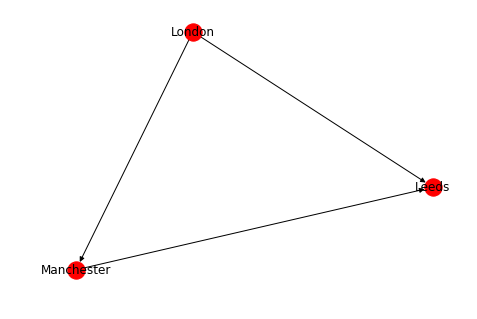

<Figure size 864x864 with 0 Axes>

In [ ]:
uk_places_adjlist = nx.read_adjlist("cities.adjlist", create_using=nx.DiGraph)
view_graph(uk_places_adjlist)

In [ ]:
nx.write_adjlist(uk_places_adjlist, "cities.adjlist")

Nodes in graph: ['London', 'Manchester', 'Leeds']
Edges in graph: [('London', 'Manchester'), ('London', 'Leeds'), ('Manchester', 'Leeds')]


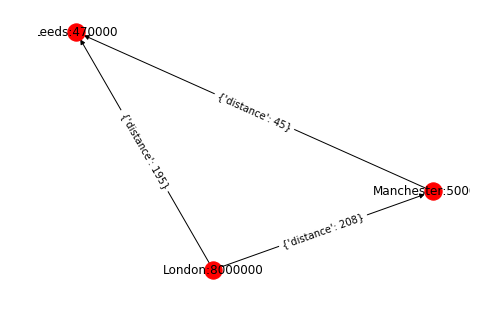

<Figure size 864x864 with 0 Axes>

In [ ]:
uk_places = nx.DiGraph(
    [("London", "Manchester"), ("Manchester", "Leeds"), ("London", "Leeds")]
)

node_attributes = {
    "London": {"population": 8000000},
    "Manchester": {"population": 500000},
    "Leeds": {"population": 470000},
}
nx.set_node_attributes(uk_places, node_attributes)

edge_attributes = {
    ("London", "Leeds"): {"distance": 195},
    ("London", "Manchester"): {"distance": 208},
    ("Manchester", "Leeds"): {"distance": 45},
}
nx.set_edge_attributes(uk_places, edge_attributes)

view_graph(uk_places)

In [ ]:
nx.write_gml(uk_places, "cities.gml")
nx.write_graphml(uk_places, "cities.graphml")

In [ ]:
! type cities.gml

graph [
  directed 1
  node [
    id 0
    label "London"
    population 8000000
  ]
  node [
    id 1
    label "Manchester"
    population 500000
  ]
  node [
    id 2
    label "Leeds"
    population 470000
  ]
  edge [
    source 0
    target 1
    distance 208
  ]
  edge [
    source 0
    target 2
    distance 195
  ]
  edge [
    source 1
    target 2
    distance 45
  ]
]


In [ ]:
! type cities.graphml

<?xml version='1.0' encoding='utf-8'?>
<graphml xmlns="http://graphml.graphdrawing.org/xmlns" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://graphml.graphdrawing.org/xmlns http://graphml.graphdrawing.org/xmlns/1.0/graphml.xsd">
  <key attr.name="distance" attr.type="long" for="edge" id="d1" />
  <key attr.name="population" attr.type="long" for="node" id="d0" />
  <graph edgedefault="directed">
    <node id="London">
      <data key="d0">8000000</data>
    </node>
    <node id="Manchester">
      <data key="d0">500000</data>
    </node>
    <node id="Leeds">
      <data key="d0">470000</data>
    </node>
    <edge source="London" target="Manchester">
      <data key="d1">208</data>
    </edge>
    <edge source="London" target="Leeds">
      <data key="d1">195</data>
    </edge>
    <edge source="Manchester" target="Leeds">
      <data key="d1">45</data>
    </edge>
  </graph>
</graphml>
